# Data loading and preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os
import json
from collections import defaultdict
import random # Importing the random module

In [3]:
#politifact_news_file
news_file = '/content/drive/MyDrive/Data/Politifact/politifact.csv'

#trainest
trainset = '/content/drive/MyDrive/Data/Politifact/trainset.csv'

#testset
testset = '/content/drive/MyDrive/Data/Politifact/testset.csv'

In [4]:
import pandas as pd
df= pd.read_csv(news_file)
df.head(3)

,news_id,news_title,news_text,source,news_label,tweet_id,tweet_created_time,tweet_text,user_id,user_name,...,value_openness_to_change_significant,value_self_enhancement,value_self_enhancement_raw,value_self_enhancement_significant,value_self_transcendence,value_self_transcendence_raw,value_self_transcendence_significant,rating,user_id_new,news_id_new
0,politifact15096,Keanu on Trump travel ban: ‘just terrible’,At the Los Angeles premiere of their latest fi...,https://www.apnews.com,fake,826667186823503874,Wed Feb 01 05:43:10 +0000 2017,Keanu on Trump travel ban: ‘just terrible’ htt...,2908313571,News247WorldPress,...,True,0.087683,0.646877,True,0.001103,0.7831,True,1,1019,458
1,politifact12486,CQ.com,Need help? Contact the CQ Hotline at (800) 678...,http://www.cq.com,real,1053122000468762624,Fri Oct 19 03:13:45 +0000 2018,Vladimir Putin gave his annual foreign policy ...,2908313571,News247WorldPress,...,True,0.087683,0.646877,True,0.001103,0.7831,True,1,1019,272
2,politifact683,NaN,NaN,http://www.cbsnews.com,real,1014571360461312000,Wed Jul 04 18:07:16 +0000 2018,Despite saying that he expected to have a deci...,2908313571,News247WorldPress,...,True,0.087683,0.646877,True,0.001103,0.7831,True,1,1019,199


In [5]:
df['news_label'].value_counts()

,count
news_label,
fake,11442
real,8823


In [6]:
df.columns

Index(['news_id', 'news_title', 'news_text', 'source', 'news_label',
       'tweet_id', 'tweet_created_time', 'tweet_text', 'user_id', 'user_name',
       ...
       'value_openness_to_change_significant', 'value_self_enhancement',
       'value_self_enhancement_raw', 'value_self_enhancement_significant',
       'value_self_transcendence', 'value_self_transcendence_raw',
       'value_self_transcendence_significant', 'rating', 'user_id_new',
       'news_id_new'],
      dtype='object', length=213)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20265 entries, 0 to 20264
Columns: 213 entries, news_id to news_id_new
dtypes: bool(52), float64(140), int64(7), object(14)
memory usage: 25.9+ MB


In [8]:
df['user_id'].nunique()

1028

In [9]:
df['news_id'].nunique()

542

## Extracting relevant news and user information

In [10]:
df_news_user=df[['news_id','news_id_new','news_title','news_text','news_label','user_id','user_id_new']]
df_news_user.head()

,news_id,news_id_new,news_title,news_text,news_label,user_id,user_id_new
0,politifact15096,458,Keanu on Trump travel ban: ‘just terrible’,At the Los Angeles premiere of their latest fi...,fake,2908313571,1019
1,politifact12486,272,CQ.com,Need help? Contact the CQ Hotline at (800) 678...,real,2908313571,1019
2,politifact683,199,NaN,NaN,real,2908313571,1019
3,politifact12079,137,It’s Time for the Senate to Do Its Job,President Obama has taken a great deal of effo...,real,2908313571,1019
4,politifact12079,137,It’s Time for the Senate to Do Its Job,President Obama has taken a great deal of effo...,real,2908313571,1019


In [11]:
df_news_user.shape

(20265, 7)

In [12]:
df_news_user['news_id_new'].nunique()

542

In [13]:
df_news_user.rename(columns={'news_id':'newsid'}, inplace=True)

/tmp/ipython-input-13-3586172709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_user.rename(columns={'news_id':'newsid'}, inplace=True)


In [14]:
df_news_user.rename(columns={'news_id_new':'news_id'}, inplace=True)

/tmp/ipython-input-14-4080120520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_user.rename(columns={'news_id_new':'news_id'}, inplace=True)


In [15]:
df_news_user.rename(columns={'user_id':'userid'}, inplace=True)

/tmp/ipython-input-15-1808183020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_user.rename(columns={'user_id':'userid'}, inplace=True)


In [16]:
df_news_user.rename(columns={'user_id_new':'user_id'}, inplace=True)

/tmp/ipython-input-16-2906277305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_user.rename(columns={'user_id_new':'user_id'}, inplace=True)


In [17]:
df_news_user.head()

,newsid,news_id,news_title,news_text,news_label,userid,user_id
0,politifact15096,458,Keanu on Trump travel ban: ‘just terrible’,At the Los Angeles premiere of their latest fi...,fake,2908313571,1019
1,politifact12486,272,CQ.com,Need help? Contact the CQ Hotline at (800) 678...,real,2908313571,1019
2,politifact683,199,NaN,NaN,real,2908313571,1019
3,politifact12079,137,It’s Time for the Senate to Do Its Job,President Obama has taken a great deal of effo...,real,2908313571,1019
4,politifact12079,137,It’s Time for the Senate to Do Its Job,President Obama has taken a great deal of effo...,real,2908313571,1019


## Extracting 542 unique news articles

In [18]:
# Extract unique news items by dropping duplicates based on 'news_id'
news_df = df_news_user.drop_duplicates(subset='news_id')


print(news_df.shape)

news_df.head()

(542, 7)


,newsid,news_id,news_title,news_text,news_label,userid,user_id
0,politifact15096,458,Keanu on Trump travel ban: ‘just terrible’,At the Los Angeles premiere of their latest fi...,fake,2908313571,1019
1,politifact12486,272,CQ.com,Need help? Contact the CQ Hotline at (800) 678...,real,2908313571,1019
2,politifact683,199,NaN,NaN,real,2908313571,1019
3,politifact12079,137,It’s Time for the Senate to Do Its Job,President Obama has taken a great deal of effo...,real,2908313571,1019
5,politifact13136,120,The first Trump-Clinton presidential debate tr...,"To see an annotation, click or tap the highlig...",real,2908313571,1019


The above 'news_df' dataframe has all the news data.

In [19]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 542 entries, 0 to 19758
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   newsid      542 non-null    object
 1   news_id     542 non-null    int64 
 2   news_title  516 non-null    object
 3   news_text   496 non-null    object
 4   news_label  542 non-null    object
 5   userid      542 non-null    int64 
 6   user_id     542 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 33.9+ KB


## trainset and testset

In [20]:
trainset= pd.read_csv(trainset)

In [21]:
trainset

,user,item,rating
0,1,288,1
1,1,353,1
2,1,435,1
3,1,184,1
4,1,416,1
...,...,...,...
19232,1028,303,1
19233,1028,234,1
19234,1028,238,1
19235,1028,215,1


In [22]:
trainset.rename(columns={'user':'user_id'}, inplace=True)
trainset.rename(columns={'item':'news_id'}, inplace=True)

In [23]:
trainset

,user_id,news_id,rating
0,1,288,1
1,1,353,1
2,1,435,1
3,1,184,1
4,1,416,1
...,...,...,...
19232,1028,303,1
19233,1028,234,1
19234,1028,238,1
19235,1028,215,1


In [24]:
news_user_df = trainset.copy()
news_user_df.head(2)

,user_id,news_id,rating
0,1,288,1
1,1,353,1


In [25]:
 news_user_df["user_id"].nunique()

1028

In [26]:
testset= pd.read_csv(testset)
testset

,user,item,rating
0,1,199,1
1,2,34,1
2,3,51,1
3,4,187,1
4,5,261,1
...,...,...,...
1023,1024,380,1
1024,1025,356,1
1025,1026,272,1
1026,1027,489,1


In [27]:
testset.rename(columns={'user':'user_id'}, inplace=True)
testset.rename(columns={'item':'news_id'}, inplace=True)

In [28]:
testset

,user_id,news_id,rating
0,1,199,1
1,2,34,1
2,3,51,1
3,4,187,1
4,5,261,1
...,...,...,...
1023,1024,380,1
1024,1025,356,1
1025,1026,272,1
1026,1027,489,1


In [29]:
#trainset['user_id'].nunique()

## Extracting neigbours with labels

creating a dictionary *'user interactions'* which has each user id as key with a list of values each a dictionay with *'news_id'* and *'label'* as keys

In [30]:
labels_dict=news_df[['news_id','news_label']].set_index('news_id')['news_label'].to_dict()

In [31]:
#testing if we have for all news for user 1
n=[288,353,435,184,416,135,135,439,135,135,3,135,395,135,135,275,458,199]
for n in n:
    print(labels_dict[n])

real
real
fake
real
real
real
real
real
real
real
fake
real
real
real
real
real
fake
real


In [32]:
#testing if we have all the users
u=df['user_id_new'].unique().tolist()
u.sort()
u

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [33]:
# Create a deep copy
user_news_interactions_copy = trainset.copy()
user_news_interactions_copy.head(2)

,user_id,news_id,rating
0,1,288,1
1,1,353,1


In [34]:
user_news_interactions_copy.drop(columns=['rating'], inplace=True)

In [35]:
user_news_interactions_copy.head(2)

,user_id,news_id
0,1,288
1,1,353


In [36]:
news_df.tail(2)

,newsid,news_id,news_title,news_text,news_label,userid,user_id
19695,politifact13443,481,Families Facing Tax Increases Under Trump's Ta...,NaN,real,3074470992,580
19758,politifact7259,179,NRA President David Keene Rejects White House ...,JUDY WOODRUFF: We come back now to the gun sto...,real,14437914,804


In [37]:
user_interactions_df = user_news_interactions_copy.merge(news_df[['news_id', 'news_label']], on='news_id', how='left')
user_interactions_df.head(2)

,user_id,news_id,news_label
0,1,288,real
1,1,353,real


In [38]:
user_interactions = user_interactions_df.groupby('user_id')[['news_id', 'news_label']].apply(
    lambda x: [{'news_id': row[0], 'news_label': row[1]} for row in x.values]
).to_dict()

In [39]:
user_interactions[1]

[{'news_id': 288, 'news_label': 'real'},
 {'news_id': 353, 'news_label': 'real'},
 {'news_id': 435, 'news_label': 'fake'},
 {'news_id': 184, 'news_label': 'real'},
 {'news_id': 416, 'news_label': 'real'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 439, 'news_label': 'real'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 3, 'news_label': 'fake'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 395, 'news_label': 'real'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 275, 'news_label': 'real'},
 {'news_id': 275, 'news_label': 'real'},
 {'news_id': 275, 'news_label': 'real'},
 {'news_id': 275, 'news_label': 'real'},
 {'news_id': 458, 'news_label': 'fake'}]

In [40]:

user_interactions[14]

[{'news_id': 77, 'news_label': 'fake'},
 {'news_id': 91, 'news_label': 'fake'},
 {'news_id': 362, 'news_label': 'fake'},
 {'news_id': 496, 'news_label': 'fake'},
 {'news_id': 534, 'news_label': 'fake'},
 {'news_id': 467, 'news_label': 'fake'},
 {'news_id': 113, 'news_label': 'fake'},
 {'news_id': 450, 'news_label': 'fake'},
 {'news_id': 450, 'news_label': 'fake'},
 {'news_id': 426, 'news_label': 'fake'},
 {'news_id': 257, 'news_label': 'fake'},
 {'news_id': 173, 'news_label': 'fake'},
 {'news_id': 23, 'news_label': 'fake'},
 {'news_id': 92, 'news_label': 'fake'},
 {'news_id': 366, 'news_label': 'fake'},
 {'news_id': 303, 'news_label': 'fake'},
 {'news_id': 111, 'news_label': 'fake'},
 {'news_id': 44, 'news_label': 'fake'},
 {'news_id': 310, 'news_label': 'fake'},
 {'news_id': 293, 'news_label': 'fake'},
 {'news_id': 340, 'news_label': 'fake'},
 {'news_id': 293, 'news_label': 'fake'},
 {'news_id': 237, 'news_label': 'fake'},
 {'news_id': 174, 'news_label': 'fake'}]

In [41]:

user_interactions

{1: [{'news_id': 288, 'news_label': 'real'},
  {'news_id': 353, 'news_label': 'real'},
  {'news_id': 435, 'news_label': 'fake'},
  {'news_id': 184, 'news_label': 'real'},
  {'news_id': 416, 'news_label': 'real'},
  {'news_id': 135, 'news_label': 'real'},
  {'news_id': 135, 'news_label': 'real'},
  {'news_id': 439, 'news_label': 'real'},
  {'news_id': 135, 'news_label': 'real'},
  {'news_id': 135, 'news_label': 'real'},
  {'news_id': 3, 'news_label': 'fake'},
  {'news_id': 135, 'news_label': 'real'},
  {'news_id': 395, 'news_label': 'real'},
  {'news_id': 135, 'news_label': 'real'},
  {'news_id': 135, 'news_label': 'real'},
  {'news_id': 275, 'news_label': 'real'},
  {'news_id': 275, 'news_label': 'real'},
  {'news_id': 275, 'news_label': 'real'},
  {'news_id': 275, 'news_label': 'real'},
  {'news_id': 458, 'news_label': 'fake'}],
 2: [{'news_id': 352, 'news_label': 'real'},
  {'news_id': 456, 'news_label': 'real'},
  {'news_id': 440, 'news_label': 'fake'},
  {'news_id': 519, 'news_labe

## Saving user_interactions data and labels data

In [42]:
import torch

In [43]:

# save user_interactions

# Save as a dictionary: {user_id: interactions}

save_path = "/content/drive/MyDrive/Data/Politifact/user_interactions.pt"


torch.save(user_interactions, save_path)
print(f"User_interactions saved at: {save_path}")

User_interactions saved at: /content/drive/MyDrive/Data/Politifact/user_interactions.pt


In [44]:

# save labels

# Save as a dictionary: {news_id: labels}

save_path = "/content/drive/MyDrive/Data/Politifact/labels.pt"


torch.save(labels_dict, save_path)
print(f"labels saved at: {save_path}")

labels saved at: /content/drive/MyDrive/Data/Politifact/labels.pt


# News Modeling


## Generate Bert Embeddings

In [45]:
import torch
from transformers import BertTokenizer, BertModel
from collections import defaultdict
from tqdm import tqdm
from torch.nn.functional import normalize

In [46]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [47]:
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

Batch Processing: Instead of processing one article at a time as in part 1 , here we use a batch size of 16 to optimize GPU/CPU usage.

CUDA Acceleration: If a GPU is available, embeddings are computed much faster.

In [48]:
def generate_news_embeddings(news_df, text_column="news_text", batch_size=16):
    """Generate normalized mean-pooled BERT embeddings for news articles."""
    embeddings = []

    for i in tqdm(range(0, len(news_df), batch_size), desc="Generating Embeddings"):

        batch_texts = news_df[text_column][i : i + batch_size].astype(str).tolist()

        # Tokenize with padding and truncation
        inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True, max_length=512)
        inputs = {key: value.to(device) for key, value in inputs.items()}  # Move to GPU

        with torch.no_grad():
            outputs = bert_model(**inputs)

        # Extract [CLS] token embeddings
        #batch_embeddings = outputs.last_hidden_state[:, 0, :]
        #embeddings.append(batch_embeddings.cpu())  # Move to CPU to save memory

        # Mean Pooling
        last_hidden = outputs.last_hidden_state                       # [batch_size, seq_len, hidden_size]
        attention_mask = inputs['attention_mask']                     # [batch_size, seq_len]
        mask = attention_mask.unsqueeze(-1).expand(last_hidden.size())  # [batch_size, seq_len, hidden_size]
        masked_hidden = last_hidden * mask
        sum_embeddings = masked_hidden.sum(dim=1)
        sum_mask = mask.sum(dim=1).clamp(min=1e-9)
        mean_pooled = sum_embeddings / sum_mask                       # [batch_size, hidden_size]

        # Normalize embeddings
        mean_pooled = normalize(mean_pooled, p=2, dim=1)

        # Move to CPU and collect
        embeddings.append(mean_pooled.cpu())


    # Concatenate all embeddings
    embeddings = torch.cat(embeddings, dim=0)

    #news_df['embedding'] = embeddings

    return embeddings

In [49]:
# If news_text is NaN, use news_title instead
news_df['text_for_embedding'] = news_df['news_text'].fillna(news_df['news_title'])
news_embeddings = generate_news_embeddings(news_df, text_column='text_for_embedding')

/tmp/ipython-input-49-4107216414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['text_for_embedding'] = news_df['news_text'].fillna(news_df['news_title'])
Generating Embeddings: 100%|██████████| 34/34 [01:34<00:00,  2.77s/it]


In [50]:
news_embeddings

tensor([[ 0.0476, -0.0143,  0.0350,  ...,  0.0082, -0.0079, -0.0422],
        [ 0.0063,  0.0053,  0.0511,  ..., -0.0139,  0.0060,  0.0251],
        [ 0.0163, -0.0133, -0.0159,  ..., -0.0071, -0.0189, -0.0148],
        ...,
        [-0.0415, -0.0271,  0.0201,  ..., -0.0005,  0.0243, -0.0001],
        [-0.0099, -0.0321,  0.0132,  ..., -0.0336, -0.0388, -0.0011],
        [-0.0071,  0.0101, -0.0038,  ..., -0.0117,  0.0004, -0.0073]])

In [51]:
torch.save(news_embeddings, 'news_embeddings_normalized.pt')

## Saving Bert Embeddings as pytorch file -news_embeddings_normalized.pt

In [52]:
# Save as a dictionary: {news_id: embedding}
news_embedding_dict = {news_df.iloc[i]["news_id"]: news_embeddings[i] for i in range(len(news_df))}

save_path = "/content/drive/MyDrive/Data/Politifact/news_embeddings_normalized.pt"

torch.save(news_embedding_dict, save_path)
print(f"Embeddings saved at: {save_path}")

Embeddings saved at: /content/drive/MyDrive/Data/Politifact/news_embeddings_normalized.pt


## Fetching precomputed Bert Embeddings -  news_embeddings.pt

In [53]:
import torch

In [54]:
save_path = "/content/drive/MyDrive/Data/Politifact/news_embeddings_normalized.pt"
news_embeddings  = torch.load(save_path,weights_only=False)
print(f"Loaded {len(news_embeddings )} embeddings!")

Loaded 542 embeddings!


In [55]:
# Assuming loaded_embeddings is your dictionary of embeddings
first_key = list(news_embeddings .keys())[0]  # Get the first key
embedding_size = news_embeddings [first_key].size()  # Get the size of the first embedding

print(f"Size of the embeddings: {embedding_size}")

Size of the embeddings: torch.Size([768])


# Calculating reliable neighbors -





## A) On toy data

In [56]:
# Example Usage on toy data-
user_interactions_sm = {
    1: [{'news_id': 101, 'label': 1}, {'news_id': 102, 'label': 0}, {'news_id': 103, 'label': 1}],
    2: [{'news_id': 201, 'label': 0}, {'news_id': 202, 'label': 0}],
    3: [{'news_id': 301, 'label': 1}, {'news_id': 302, 'label': 1}, {'news_id': 303, 'label': 1}]
}

In [57]:
user_interactions_sm.get(1, [])

[{'news_id': 101, 'label': 1},
 {'news_id': 102, 'label': 0},
 {'news_id': 103, 'label': 1}]

In [58]:
import numpy as np
from collections import defaultdict

def compute_reputation(user_interactions_sm):

    # Compute the reputation score R_i for each user based on the number of genuine and fake news shared.

    reputation_scores = {}
    for user_id, interactions in user_interactions_sm.items():
        N_s = sum(1 for item in interactions if item['label'] == 1)  # Count genuine news
        N_f = sum(1 for item in interactions if item['label'] == 0)  # Count fake news
        reputation_scores[user_id] = (N_s + 1) / (N_s + N_f + 2)  # Apply formula

    return reputation_scores


def build_news_user_mapping(user_interactions_sm):

    # Build a mapping of news_id -> list of users who interacted with that news.

    news_user_map = defaultdict(set)

    for user_id, interactions in user_interactions_sm.items():
        for item in interactions:
            news_user_map[item['news_id']].add(user_id)

    print(news_user_map)

    return news_user_map


def select_trusted_neighbors(user_id, user_interactions_sm, reputation_scores, news_user_map):

    # Select trusted neighbors for a given user based on reliability.

    trusted_neighbors = set()

    # Find users who interacted with the same news articles as the given user
    for item in user_interactions_sm.get(user_id, []):
        news_id = item['news_id']
        neighbors = news_user_map.get(news_id, set())



        for neighbor in neighbors:
            if neighbor != user_id:  # Avoid self-comparison

                if reputation_scores[neighbor] > 0.5:
                    trusted_neighbors.add(neighbor)

    return list(trusted_neighbors)


# Example Usage
user_interactions_sm = {
    1: [{'news_id': 101, 'label': 1}, {'news_id': 102, 'label': 0}, {'news_id': 103, 'label': 1}],
    2: [{'news_id': 101, 'label': 0}, {'news_id': 202, 'label': 0}],
    3: [{'news_id': 301, 'label': 1}, {'news_id': 302, 'label': 1}, {'news_id': 103, 'label': 1}],
    4: [{'news_id': 101, 'label': 1}, {'news_id': 103, 'label': 0}]
}

# Step 1: Compute reputation
reputation_scores = compute_reputation(user_interactions_sm)

# Step 2: Build news-user mapping
news_user_map = build_news_user_mapping(user_interactions_sm)

# Step 3: Select trusted neighbors for each user
trusted_neighbors_dict = {user: select_trusted_neighbors(user, user_interactions_sm, reputation_scores, news_user_map) for user in user_interactions_sm}

print("Reputation Scores:", reputation_scores)
print("Trusted Neighbors:", trusted_neighbors_dict)


defaultdict(<class 'set'>, {101: {1, 2, 4}, 102: {1}, 103: {1, 3, 4}, 202: {2}, 301: {3}, 302: {3}})
Reputation Scores: {1: 0.6, 2: 0.25, 3: 0.8, 4: 0.5}
Trusted Neighbors: {1: [3], 2: [1], 3: [1], 4: [1, 3]}


*Code checked and verified on toy data*

- Computed Reputation scores for all users

- Built news_user_map: A mapping of news_id → {users who interacted with it} to properly define neighbors.

- Used Precomputed Reputation Scores

- Avoids Self-Comparison: Ensures a user isn’t selecting themselves as a trusted neighbor.


## B) On original data

In [59]:
def compute_reputation(user_interactions):

    # Compute the reputation score R_i for each user based on the number of genuine and fake news shared.

    reputation_scores = {}
    for user_id, interactions in user_interactions.items():
        N_s = sum(1 for item in interactions if item['news_label'] == 'real')  # Count genuine news
        N_f = sum(1 for item in interactions if item['news_label'] == 'fake')  # Count fake news
        reputation_scores[user_id] = (N_s + 1) / (N_s + N_f + 2)  # Apply formula

    return reputation_scores


def build_news_user_mapping(user_interactions):

    # Build a mapping of news_id -> list of users who interacted with that news.

    news_user_map = defaultdict(set)

    for user_id, interactions in user_interactions.items():
        for item in interactions:
            news_user_map[item['news_id']].add(user_id)

    return news_user_map


def select_trusted_neighbors(user_id, user_interactions, reputation_scores, news_user_map, theta=0.1):

    # Select trusted neighbors for a given user based on reliability.

    trusted_neighbors = set()

    # Find users who interacted with the same news articles as the given user
    for item in user_interactions.get(user_id, []):
        news_id = item['news_id']
        neighbors = news_user_map.get(news_id, set())

        for neighbor in neighbors:
            if neighbor != user_id:  # Avoid self-comparison

                if reputation_scores[neighbor]  > 0.5:
                    trusted_neighbors.add(neighbor)

    return list(trusted_neighbors)


# Step 1: Compute reputation
reputation_scores = compute_reputation(user_interactions)

# Step 2: Build news-user mapping
news_user_map = build_news_user_mapping(user_interactions)

# Step 3: Select trusted neighbors for each user
trusted_neighbors_dict = {user: select_trusted_neighbors(user, user_interactions, reputation_scores, news_user_map) for user in user_interactions}

#print("Reputation Scores:", reputation_scores)
#print("Trusted Neighbors:", trusted_neighbors_dict)

In [60]:
# Randomly select 5 keys and print their key-value pairs
random_keys = random.sample(list(reputation_scores.keys()), 5)

for key in random_keys:
    print(f"User ID: {key}, Reliability: {reputation_scores[key]}")

User ID: 101, Reliability: 0.09090909090909091
User ID: 556, Reliability: 0.06666666666666667
User ID: 624, Reliability: 0.7777777777777778
User ID: 133, Reliability: 0.11764705882352941
User ID: 990, Reliability: 0.2222222222222222


In [61]:
# Randomly select 5 keys and print their key-value pairs
random_keys = random.sample(list(trusted_neighbors_dict.keys()), 5)

for key in random_keys:
    print(f"User ID: {key}, Trusted neighbours: {trusted_neighbors_dict[key]}")

User ID: 42, Trusted neighbours: [1026, 3, 519, 520, 521, 18, 19, 20, 532, 533, 534, 26, 30, 545, 550, 553, 46, 559, 569, 60, 61, 572, 575, 68, 580, 582, 593, 604, 98, 100, 612, 613, 614, 615, 106, 619, 117, 637, 126, 130, 135, 652, 141, 653, 666, 670, 161, 162, 676, 165, 167, 168, 172, 173, 174, 689, 698, 701, 194, 706, 205, 727, 728, 217, 224, 744, 233, 234, 747, 236, 239, 241, 245, 762, 251, 258, 774, 263, 266, 267, 778, 783, 272, 785, 788, 791, 796, 800, 804, 805, 808, 809, 810, 299, 819, 820, 309, 824, 315, 840, 329, 333, 336, 854, 345, 858, 352, 865, 357, 869, 360, 872, 362, 363, 364, 371, 887, 377, 379, 380, 381, 895, 394, 906, 909, 913, 915, 405, 917, 407, 408, 919, 417, 930, 419, 422, 935, 940, 432, 440, 442, 955, 958, 451, 452, 966, 967, 463, 976, 977, 507, 470, 477, 991, 995, 492, 493, 1004, 1009, 1010, 1011, 1012, 502, 1015, 1019, 1020]
User ID: 487, Trusted neighbours: [130, 655, 18, 919, 545, 165, 425, 172, 46, 174, 945, 307, 563, 442, 701, 958, 703, 68, 454, 582, 971, 10

In [62]:
len(trusted_neighbors_dict)

1028

Computed trusted neighbours for each user.

# Recommendation prediction

##Leave one out

In [63]:
train_data = {}  # {user_id: [list of news IDs for training]}
test_data = {}   # {user_id: held-out news ID for testing}

for user_id, interactions in user_interactions.items():
    train_data[user_id] = interactions[:]

In [64]:
train_data[1]

[{'news_id': 288, 'news_label': 'real'},
 {'news_id': 353, 'news_label': 'real'},
 {'news_id': 435, 'news_label': 'fake'},
 {'news_id': 184, 'news_label': 'real'},
 {'news_id': 416, 'news_label': 'real'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 439, 'news_label': 'real'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 3, 'news_label': 'fake'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 395, 'news_label': 'real'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 135, 'news_label': 'real'},
 {'news_id': 275, 'news_label': 'real'},
 {'news_id': 275, 'news_label': 'real'},
 {'news_id': 275, 'news_label': 'real'},
 {'news_id': 275, 'news_label': 'real'},
 {'news_id': 458, 'news_label': 'fake'}]

In [65]:
testset_df = testset.merge(news_df[['news_id', 'news_label']], on='news_id', how='left')
testset_df.head(2)

,user_id,news_id,rating,news_label
0,1,199,1,real
1,2,34,1,real


In [66]:
for index, row in testset_df.iterrows():
    test_data[row['user_id']] = {'news_id': row['news_id'],'news_label':row['news_label']}

In [67]:
test_data[1]

{'news_id': 199, 'news_label': 'real'}

In [68]:
len(test_data)

1028

##Training data analysis

In [69]:
def analyze_user_preferences(user_interactions, news_embeddings, labels_dict):
    """Analyze what makes a good negative sample"""
    stats = {
        'total_users': len(user_interactions),
        'fake_interactions': 0,
        'real_interactions': 0,
        'avg_interactions_per_user': 0
    }

    total_interactions = 0
    for user_id, interactions in user_interactions.items():
        total_interactions += len(interactions)
        for interaction in interactions:
            if labels_dict.get(interaction['news_id']) == 'fake':
                stats['fake_interactions'] += 1
            else:
                stats['real_interactions'] += 1

    stats['avg_interactions_per_user'] = total_interactions / len(user_interactions)
    stats['fake_ratio_in_training'] = stats['fake_interactions'] / total_interactions

    print("Training Data Analysis:")
    print(f"- Users have {stats['fake_ratio_in_training']:.3f} fake news interactions on average")
    print(f"- Average interactions per user: {stats['avg_interactions_per_user']:.1f}")

    return stats

In [70]:
analyze_user_preferences(train_data, news_embeddings, labels_dict)

Training Data Analysis:
- Users have 0.572 fake news interactions on average
- Average interactions per user: 18.7


{'total_users': 1028,
 'fake_interactions': 11005,
 'real_interactions': 8232,
 'avg_interactions_per_user': 18.71303501945525,
 'fake_ratio_in_training': 0.5720746478141082}

In [71]:
# average number of positive interactions per user
avg_interactions = np.mean([len(interactions) for interactions in train_data.values()])
print(f"Average interactions per user: {avg_interactions}")

Average interactions per user: 18.71303501945525


##Negative sampling

In [72]:
def negative_sampling(user_interactions, news_embeddings, labels_dict, user_id, pos_news_ids, K=10):

    all_news = list(news_embeddings.keys())
    pos_set = set(pos_news_ids)
    available_news = list(set(all_news) - pos_set)

    fake_candidates = [nid for nid in available_news if labels_dict.get(nid) == 'fake']
    real_candidates = [nid for nid in available_news if labels_dict.get(nid) == 'real']


    fake_count = int(K * 0.7)
    real_count = K - fake_count

    negatives = []


    if fake_candidates:
        fake_sample_size = min(fake_count, len(fake_candidates))
        negatives.extend(random.sample(fake_candidates, fake_sample_size))


    if real_candidates:
        real_sample_size = min(real_count, len(real_candidates))
        negatives.extend(random.sample(real_candidates, real_sample_size))


    remaining = list(set(available_news) - set(negatives))
    while len(negatives) < K and remaining:
        negatives.append(remaining.pop(random.randint(0, len(remaining)-1)))

    return negatives[:K]

## Model training

In [73]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
from collections import defaultdict
import numpy as np
from sklearn.metrics import roc_auc_score
import time

def set_seed(seed=1):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

set_seed(1)

class NewsAttention(nn.Module):
    def __init__(self, embed_dim, num_heads=4):
        super(NewsAttention, self).__init__()
        self.W = nn.Linear(embed_dim, num_heads)

    def forward(self, news_embeddings):
        attn_raw = self.W(news_embeddings)
        attn_weights = F.softmax(attn_raw, dim=0)
        headwise_user_emb = torch.einsum('nh,nd->hd', attn_weights, news_embeddings)
        user_embedding = headwise_user_emb.mean(dim=0)
        return user_embedding, attn_weights

class NeighborAggregation(nn.Module):
    def __init__(self, embed_dim):
        super(NeighborAggregation, self).__init__()
        self.W = nn.Linear(embed_dim, 1)

    def forward(self, neighbor_embeddings):
        attention_scores = self.W(neighbor_embeddings).squeeze(-1)
        attention_weights = F.softmax(attention_scores, dim=0)
        neighbor_embedding = torch.sum(neighbor_embeddings * attention_weights.unsqueeze(-1), dim=0)
        return neighbor_embedding, attention_weights

class UserMLP(nn.Module):
    def __init__(self, embed_dim, dropout_rate=0.2):
        super(UserMLP, self).__init__()
        self.fc1 = nn.Linear(2 * embed_dim, embed_dim)
        self.fc2 = nn.Linear(embed_dim, embed_dim)
        self.fc3 = nn.Linear(embed_dim, embed_dim)
        self.fc4 = nn.Linear(embed_dim, embed_dim)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, news_embedding, neighbor_embedding):
        combined = torch.cat((news_embedding, neighbor_embedding), dim=0)
        g1 = F.relu(self.fc1(combined))
        g1 = self.dropout(g1)
        g2 = F.relu(self.fc2(g1))
        g2 = self.dropout(g2)
        g3 = F.relu(self.fc3(g2))
        g3 = self.dropout(g3)
        h_i = self.fc4(g3)
        return h_i


class ScoringLayer(nn.Module):
    def __init__(self, embed_dim):
        super(ScoringLayer, self).__init__()
        self.fc1 = nn.Linear(embed_dim, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, user_embedding, news_embedding):
        x = user_embedding * news_embedding
        x = F.relu(self.fc1(x))
        return self.fc2(x).squeeze()


class EndToEndRecommendationModel(nn.Module):
    def __init__(self, embed_dim, news_embeddings, user_interactions, trusted_neighbors_dict):
        super(EndToEndRecommendationModel, self).__init__()
        self.news_embeddings = news_embeddings
        self.user_interactions = user_interactions
        self.trusted_neighbors_dict = trusted_neighbors_dict

        self.news_attention = NewsAttention(embed_dim)
        self.neighbor_attention = NeighborAggregation(embed_dim)
        self.user_mlp = UserMLP(embed_dim)
        self.scoring = ScoringLayer(embed_dim)

        self.cached_hiN = {}
        self.cached_hiS = {}
        self.cached_user_embeddings = {}

    def get_user_news_embeddings(self, user_id):
        news_ids = [x['news_id'] for x in self.user_interactions[user_id]]
        return torch.stack([self.news_embeddings[nid] for nid in news_ids[:50]])

    def get_neighbor_embeddings(self, user_id):
        neighbors = self.trusted_neighbors_dict.get(user_id, [])
        embeddings = []
        for nid in neighbors:
            if nid in self.cached_hiN:
                embeddings.append(self.cached_hiN[nid])
            elif nid in self.user_interactions:
                news_embs = self.get_user_news_embeddings(nid)
                emb = self.news_attention(news_embs)[0]
                embeddings.append(emb)
        if embeddings:
            return torch.stack(embeddings)
        else:
            return torch.zeros((1, next(iter(self.news_embeddings.values())).shape[0]))

    def forward(self, user_id, candidate_news_id):
        if user_id not in self.cached_user_embeddings:
            user_news_embs = self.get_user_news_embeddings(user_id)
            hiN, _ = self.news_attention(user_news_embs)
            self.cached_hiN[user_id] = hiN

            neighbor_embs = self.get_neighbor_embeddings(user_id)
            hiS, _ = self.neighbor_attention(neighbor_embs)
            self.cached_hiS[user_id] = hiS

            user_emb = self.user_mlp(hiN, hiS)
            self.cached_user_embeddings[user_id] = user_emb
        else:
            user_emb = self.cached_user_embeddings[user_id]

        news_emb = self.news_embeddings[candidate_news_id]
        return self.scoring(user_emb, news_emb)


In [74]:
def train_model(model, train_data, news_embeddings, labels_dict, epochs=10, K=10, lr=1e-3):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        total_loss = 0
        model.train()

        for i, (user_id, interactions) in enumerate(train_data.items()):
            model.cached_hiN.clear()
            model.cached_hiS.clear()
            model.cached_user_embeddings.clear()

            pos_news_ids = [x['news_id'] for x in interactions]
            pos_scores = torch.stack([model(user_id, nid) for nid in pos_news_ids])

            neg_news_ids = negative_sampling(
                train_data, news_embeddings, labels_dict,
                user_id, pos_news_ids, K
            )

            neg_scores = torch.stack([model(user_id, nid) for nid in neg_news_ids])


            pos_scores_expanded = pos_scores.unsqueeze(1)
            neg_scores_expanded = neg_scores.unsqueeze(0).expand(len(pos_scores), -1)
            all_scores = torch.cat([pos_scores_expanded, neg_scores_expanded], dim=1)
            exp_scores = torch.exp(all_scores)
            pi = exp_scores[:, 0] / torch.sum(exp_scores, dim=1)

            user_loss = -torch.sum(torch.log(pi)) / len(pos_news_ids)

            optimizer.zero_grad()
            user_loss.backward()
            optimizer.step()
            total_loss += user_loss.item()

        print(f"Epoch {epoch+1} Loss: {total_loss / len(train_data):.4f}")

In [75]:
embed_dim = next(iter(news_embeddings.values())).shape[0]

In [76]:
type(news_embeddings),len(news_embeddings),type(trusted_neighbors_dict),len(trusted_neighbors_dict),type(labels_dict),len(labels_dict),type(train_data),len(train_data),type(test_data),len(test_data),embed_dim

(dict, 542, dict, 1028, dict, 542, dict, 1028, dict, 1028, 768)

In [77]:
model = EndToEndRecommendationModel(
    embed_dim=embed_dim,
    news_embeddings=news_embeddings,
    user_interactions=user_interactions,
    trusted_neighbors_dict=trusted_neighbors_dict
)

In [78]:
subset_train_data = dict(list(train_data.items())[:5])   # sample data

In [79]:
train_data = dict(list(train_data.items())[:])   # full data

### Run model for full data

In [80]:
train_model(model, train_data, news_embeddings, labels_dict, epochs=20)

Epoch 1 Loss: 2.2295
Epoch 2 Loss: 1.9979
Epoch 3 Loss: 1.8471
Epoch 4 Loss: 1.7719
Epoch 5 Loss: 1.7196
Epoch 6 Loss: 1.7120
Epoch 7 Loss: 1.6737
Epoch 8 Loss: 1.6528
Epoch 9 Loss: 1.6363
Epoch 10 Loss: 1.5809
Epoch 11 Loss: 1.5870
Epoch 12 Loss: 1.5866
Epoch 13 Loss: 1.5460
Epoch 14 Loss: 1.5552
Epoch 15 Loss: 1.5400
Epoch 16 Loss: 1.5070
Epoch 17 Loss: 1.5337
Epoch 18 Loss: 1.5190
Epoch 19 Loss: 1.4803
Epoch 20 Loss: 1.4961


## Evaluation

In [81]:
def evaluate_model(model, test_data, news_embeddings, labels_dict, K=5):
    model.eval()
    model.cached_hiN.clear()
    model.cached_hiS.clear()
    model.cached_user_embeddings.clear()

    hits, reciprocal_ranks, ndcg_scores, tf_at_k = 0, [], [], 0
    y_true, y_scores = [], []

    with torch.no_grad():
        for user_id, test_interaction in test_data.items():
            test_news_id = test_interaction['news_id']

            news_scores = {nid: model(user_id, nid).item() for nid in news_embeddings}
            sorted_news = sorted(news_scores, key=news_scores.get, reverse=True)

            if test_news_id in sorted_news[:K]:
                hits += 1

            y_true.append(1)
            y_scores.append(news_scores[test_news_id])
            y_true.extend([0] * (len(news_embeddings) - 1))
            y_scores.extend([news_scores[nid] for nid in news_embeddings if nid != test_news_id])

            rank = sorted_news.index(test_news_id) + 1
            reciprocal_ranks.append(1 / rank)
            dcg = 1 / np.log2(rank + 1)
            idcg = 1 / np.log2(2)
            ndcg_scores.append(dcg / idcg)

            top_k_news = sorted_news[:K]
            fake_news_count = sum(1 for nid in top_k_news if labels_dict[nid] == 'fake')
            tf_at_k += fake_news_count / K

    hit_rate = hits / len(test_data)
    rocauc = roc_auc_score(y_true, y_scores)
    return hit_rate, rocauc, np.mean(reciprocal_ranks), np.mean(ndcg_scores), tf_at_k / len(test_data)

In [82]:
#subset_test_data = dict(list(test_data.items())[:5]) # sample data

In [83]:
test_data = dict(list(test_data.items())[:]) # full data

In [84]:
hit_rate, rocauc, mrr, ndcg, tf_at_k = evaluate_model(
    model=model,
    test_data=test_data,
    news_embeddings=news_embeddings,
    labels_dict=labels_dict,
    K=10
)
print(f"Hit Rate : {hit_rate * 100:.2f}%")
print(f"ROCAUC: {rocauc:.4f}")
print(f"MRR: {mrr:.4f}")
print(f"nDCG: {ndcg:.4f}")
print(f"TF: {tf_at_k:.4f}")

Hit Rate : 23.74%
ROCAUC: 0.8347
MRR: 0.1116
nDCG: 0.2560
TF: 0.5504


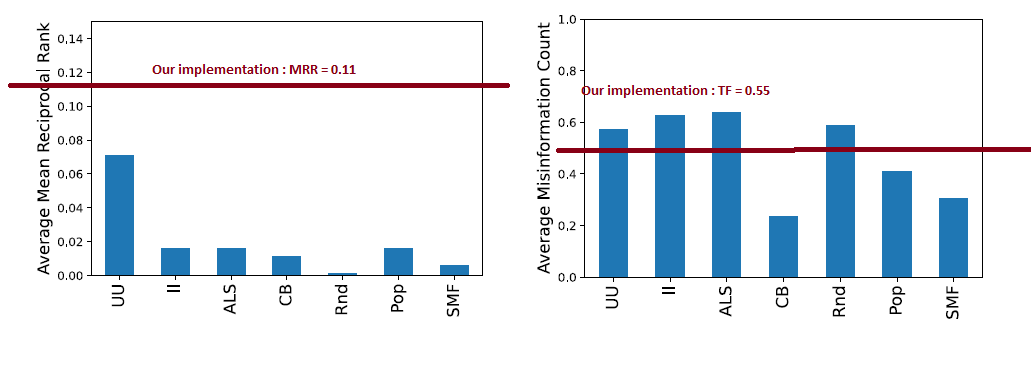

Training Insights:

• Consistent improvement

• No overfitting detected

• Strong convergence

• Reproducible with seed=1

• Performance well over target baselines




